In [2]:
%load_ext autoreload

%autoreload 2

%matplotlib inline

from __future__ import print_function, division

import numpy as np
import eos_integrate
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc("figure", dpi=144)
import scipy.optimize
import pickle


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [47]:
SMALL_SIZE = 7
matplotlib.rc('font', size=SMALL_SIZE)
matplotlib.rc('axes', titlesize=SMALL_SIZE)
PANEL_LABEL_SIZE = 8

onecolumn_width = 89/25.4
twocolumn_width = 183/25.4
page_height = 247/25.4
mid1_width = 120/25.4
mid2_width = 136/25.4

golden = (1+np.sqrt(5))/2

In [4]:
def set_size_ratio(fig, width, ratio=1/golden):
    fig.set_size_inches(width, width*ratio)
    # idea: arrange for the axes to have proportions according to ratio
    

In [32]:
# -*- coding: iso-8859-1 -*-

"""
Colour-blind proof distinct colours module, based on work by Paul Tol
Pieter van der Meer, 2011
SRON - Netherlands Institute for Space Research
"""

# colour table in HTML hex format
hexcols = ['#332288', '#88CCEE', '#44AA99', '#117733', '#999933', '#DDCC77', 
           '#CC6677', '#882255', '#AA4499', '#661100', '#6699CC', '#AA4466',
           '#4477AA']

greysafecols = ['#809BC8', '#FF6666', '#FFCC66', '#64C204']

xarr = [[12], 
        [12, 6], 
        [12, 6, 5], 
        [12, 6, 5, 3], 
        [0, 1, 3, 5, 6], 
        [0, 1, 3, 5, 6, 8], 
        [0, 1, 2, 3, 5, 6, 8], 
        [0, 1, 2, 3, 4, 5, 6, 8], 
        [0, 1, 2, 3, 4, 5, 6, 7, 8], 
        [0, 1, 2, 3, 4, 5, 9, 6, 7, 8], 
        [0, 10, 1, 2, 3, 4, 5, 9, 6, 7, 8], 
        [0, 10, 1, 2, 3, 4, 5, 9, 6, 11, 7, 8]]

# get specified nr of distinct colours in HTML hex format.
# in: nr - number of colours [1..12]
# returns: list of distinct colours in HTML hex
def get_distinct(nr):

    #
    # check if nr is in correct range
    #
    
    if nr < 1 or nr > 12:
        print("wrong nr of distinct colours!")
        return

    #
    # get list of indices
    #
    
    lst = xarr[nr-1]
    
    #
    # generate colour list by stepping through indices and looking them up
    # in the colour table
    #

    i_col = 0
    col = [0] * nr
    for idx in lst:
        col[i_col] = hexcols[idx]
        i_col+=1
    return col

# gets 4 colours, which also look distinct in black&white
# returns: list of 4 colours in 
#def get_distinct_grey():


/users/aarchiba/.virtualenvs/triplesystem/lib/python2.7/site-packages/ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in log10


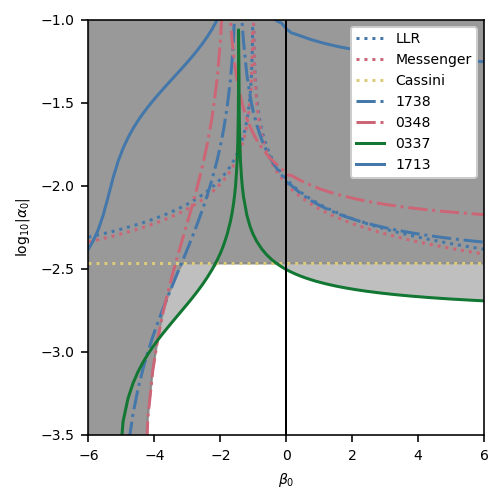

In [33]:
d = pickle.load(open("alpha-beta.pickle","rb"))
colorbrewer_out = """
#1b9e77
#d95f02
#7570b3
#e7298a
#66a61e
#e6ab02
"""
#cbout2 = ['#a6cee3','#1f78b4','#b2df8a','#33a02c']
#cbout2 = ['#e41a1c','#377eb8','#4daf4a','#984ea3']
#cbout2 = ['#1b9e77','#d95f02','#7570b3','#e7298a']
#cbout2 = ["#8da54f",
#    "#6b62b9",
#    "#bb5542",
#    "#b55d97"]
cbout2 = get_distinct(4)
cbout = [c.strip() for c in colorbrewer_out.split() if c.strip()]
colors = dict(zip(sorted(d["alphas"].keys()), cbout))
styles = {
    "LLR": ":",
    "Messenger": ":",
    "Cassini": ":",
    "1738": "-.",
    "0348": "-.",
    "0337": "-",
    "WB": "-",
}
#colors_few = {
#    "LLR": "blue",
#    "Messenger": "cyan",
#    "Cassini": "red",
#    "1738": "blue",
#    "0348": "cyan",
#    "0337": "gold",
#    "WB": "cyan",    
#}
colors_few = {
    "LLR": cbout2[0],
    "Messenger": cbout2[1],
    "Cassini": cbout2[2],
    "1738": cbout2[0],
    "0348": cbout2[1],
    "0337": cbout2[3],
    "WB": cbout2[0],    
}

llr_label = "LLR"
for a in d["alphas_llr"]:
    plt.plot(d["betas_llr"],np.log10(a),styles["LLR"],
             color=colors_few["LLR"],
             label=llr_label)
    llr_label=None
mess_label = "Messenger"
for a in d["alphas_mess"]:
    plt.plot(d["betas_mess"],np.log10(a),styles["Messenger"],
             color=colors_few["Messenger"],
             label=mess_label)
    mess_label=None
    
pr_old = np.inf*np.ones_like(d["betas"])
pr_new = np.inf*np.ones_like(d["betas"])

for k in d["alphas"].keys():
    if k=="WB":
        l = "1713"
    else:
        l = k
    plt.plot(d["betas"], np.log10(np.abs(d["alphas"][k])), 
             styles[k], color=colors_few[k], label=l)
    pr_new = np.minimum(pr_new, np.abs(d["alphas"][k]))
    if k!="0337":
        pr_old = np.minimum(pr_old, np.abs(d["alphas"][k]))
pr_old = np.maximum(pr_old, 1e-10)
pr_new = np.maximum(pr_new, 1e-10)
plt.fill_between(d["betas"], 10, np.log10(pr_old), 
                 color="dimgray", alpha=0.5) 
plt.fill_between(d["betas"], 10, np.log10(pr_new), 
                 color="gray", alpha=0.5) 
plt.axvline(0, color="k",linewidth=1)
#plt.axvline(-1.445)
#plt.axvline(-1.440)
plt.xlim(-6,6)
#plt.xlim(-1.46,-1.42)
plt.ylim(-3.5,-1)
plt.legend(loc="upper right",
           facecolor="white",
           framealpha=1)
plt.ylabel(r"$\log_{10}|\alpha_0|$")
plt.xlabel(r"$\beta_0$")
plt.gcf().set_size_inches(onecolumn_width,onecolumn_width)
plt.tight_layout()
plt.savefig("alpha-beta.pdf")

In [34]:
d['alphas'].keys()

['Cassini', '1738', '0348', '0337', 'WB']

In [37]:
len(d['betas']), len(d['betas_llr'])

(134, 10000)

/users/aarchiba/.virtualenvs/triplesystem/lib/python2.7/site-packages/ipykernel_launcher.py:77: RuntimeWarning: divide by zero encountered in log10


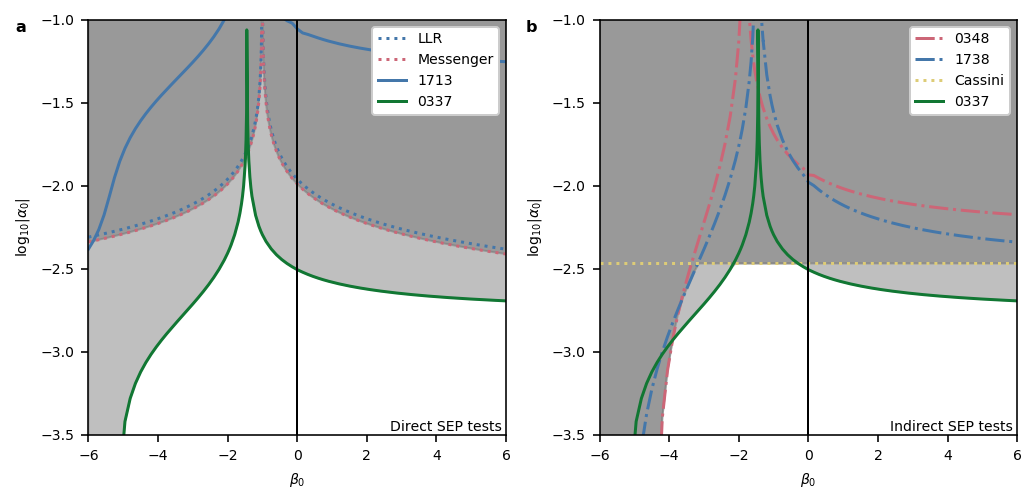

In [59]:


plt.subplot(121)

llr_label = "LLR"
for a in d["alphas_llr"]:
    plt.plot(d["betas_llr"],np.log10(a),styles["LLR"],
             color=colors_few["LLR"],
             label=llr_label)
    llr_label=None
mess_label = "Messenger"
for a in d["alphas_mess"]:
    plt.plot(d["betas_mess"],np.log10(a),styles["Messenger"],
             color=colors_few["Messenger"],
             label=mess_label)
    mess_label=None

pr_old = np.inf*np.ones_like(d["betas"])
pr_new = np.inf*np.ones_like(d["betas"])

for k in ['WB','0337']:
    if k=="WB":
        l = "1713"
    else:
        l = k
    plt.plot(d["betas"], np.log10(np.abs(d["alphas"][k])), 
             styles[k], color=colors_few[k], label=l)
    pr_new = np.minimum(pr_new, np.abs(d["alphas"][k]))
    if k!="0337":
        pr_old = np.minimum(pr_old, np.abs(d["alphas"][k]))
pr_old = np.maximum(pr_old, 1e-10)
pr_new = np.maximum(pr_new, 1e-10)
#plt.fill_between(d["betas"], 10, np.log10(pr_old), 
#                 color="dimgray", alpha=0.5) 
am = np.nanmin(np.array(d['alphas_mess']), axis=0)
plt.fill_between(d["betas_mess"], 10, np.log10(am), 
                 color="dimgray", alpha=0.5) 
plt.fill_between(d["betas"], 10, np.log10(pr_new), 
                 color="gray", alpha=0.5) 
plt.axvline(0, color="k",linewidth=1)
#plt.axvline(-1.445)
#plt.axvline(-1.440)
plt.xlim(-6,6)
#plt.xlim(-1.46,-1.42)
plt.ylim(-3.5,-1)
plt.legend(loc="upper right",
           facecolor="white",
           framealpha=1)
plt.ylabel(r"$\log_{10}|\alpha_0|$")
plt.xlabel(r"$\beta_0$")
plt.text(-0.15,1,"a", 
         horizontalalignment="right",
         verticalalignment="top",
         transform=plt.gca().transAxes,
         family='sans-serif',
         size=PANEL_LABEL_SIZE,
         weight='bold')
plt.text(0.99,0.01,"Direct SEP tests",
         horizontalalignment="right",
         verticalalignment="baseline",
         transform=plt.gca().transAxes,
         family='sans-serif',
         )
    
    
    
plt.subplot(122)
   
pr_old = np.inf*np.ones_like(d["betas"])
pr_new = np.inf*np.ones_like(d["betas"])

for k in ['0348', '1738', 'Cassini', '0337']:
    if k=="WB":
        l = "1713"
    else:
        l = k
    plt.plot(d["betas"], np.log10(np.abs(d["alphas"][k])), 
             styles[k], color=colors_few[k], label=l)
    pr_new = np.minimum(pr_new, np.abs(d["alphas"][k]))
    if k!="0337":
        pr_old = np.minimum(pr_old, np.abs(d["alphas"][k]))
pr_old = np.maximum(pr_old, 1e-10)
pr_new = np.maximum(pr_new, 1e-10)
plt.fill_between(d["betas"], 10, np.log10(pr_old), 
                 color="dimgray", alpha=0.5) 
plt.fill_between(d["betas"], 10, np.log10(pr_new), 
                 color="gray", alpha=0.5) 
plt.axvline(0, color="k",linewidth=1)
#plt.axvline(-1.445)
#plt.axvline(-1.440)
plt.xlim(-6,6)
#plt.xlim(-1.46,-1.42)
plt.ylim(-3.5,-1)
plt.legend(loc="upper right",
           facecolor="white",
           framealpha=1)
plt.ylabel(r"$\log_{10}|\alpha_0|$")
plt.xlabel(r"$\beta_0$")
plt.text(-0.15,1,"b", 
         horizontalalignment="right",
         verticalalignment="top",
         transform=plt.gca().transAxes,
         family='sans-serif',
         size=PANEL_LABEL_SIZE,
         weight='bold')
plt.text(0.99,0.01,"Indirect SEP tests",
         horizontalalignment="right",
         verticalalignment="baseline",
         transform=plt.gca().transAxes,
         family='sans-serif',
         )
plt.gcf().set_size_inches(twocolumn_width,onecolumn_width)
plt.tight_layout()
plt.savefig("alpha-beta-two.pdf")

/users/aarchiba/.virtualenvs/triplesystem/lib/python2.7/site-packages/ipykernel_launcher.py:110: RuntimeWarning: divide by zero encountered in log10
/users/aarchiba/.virtualenvs/triplesystem/lib/python2.7/site-packages/ipykernel_launcher.py:112: RuntimeWarning: divide by zero encountered in log10


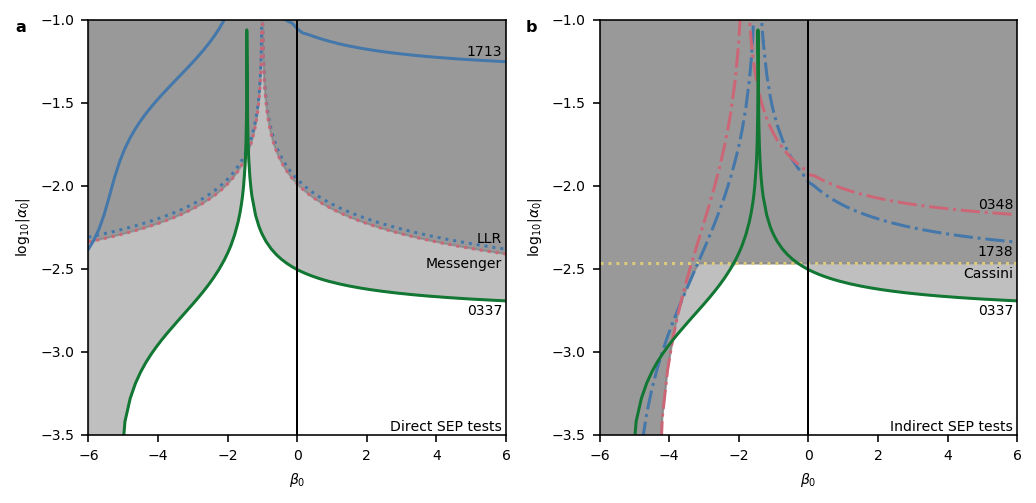

In [69]:
label_offsets = {
    "LLR": (-2,5),
    "Messenger":(-2,-5),
    "WB":(-2,5),
    "0337":(-2,-5),
    "0348":(-2,5),
    "1738":(-2,-5),
    "Cassini":(-2,-5),
}
                     
plt.subplot(121)

llr_label = "LLR"
y = None
for a in d["alphas_llr"]:
    plt.plot(d["betas_llr"],np.log10(a),styles["LLR"],
             color=colors_few["LLR"],
             label=llr_label)
    if np.isfinite(np.log10(a)[-1]):
        y = np.log10(a)[-1]
    llr_label=None
plt.annotate(xy=(d["betas_llr"][-1],y),
             xytext=label_offsets["LLR"],
             s="LLR",
             horizontalalignment="right",
             verticalalignment="center",
             textcoords="offset points")

mess_label = "Messenger"
y = None
for a in d["alphas_mess"]:
    plt.plot(d["betas_mess"],np.log10(a),styles["Messenger"],
             color=colors_few["Messenger"],
             label=mess_label)
    if np.isfinite(np.log10(a)[-1]):
        y = np.log10(a)[-1]
    mess_label=None
plt.annotate(xy=(d["betas_mess"][-1],y),
             xytext=label_offsets["Messenger"],
             s="Messenger",
             horizontalalignment="right",
             verticalalignment="center",
             textcoords="offset points")

pr_old = np.inf*np.ones_like(d["betas"])
pr_new = np.inf*np.ones_like(d["betas"])

for k in ['WB','0337']:
    if k=="WB":
        l = "1713"
    else:
        l = k
    plt.plot(d["betas"], np.log10(np.abs(d["alphas"][k])), 
             styles[k], color=colors_few[k], label=l)
    plt.annotate(xy=(d["betas"][-1],np.log10(np.abs(d["alphas"][k]))[-1]),
                 xytext=label_offsets[k],
                 s=l,
                 horizontalalignment="right",
                 verticalalignment="center",
                 textcoords="offset points")
    pr_new = np.minimum(pr_new, np.abs(d["alphas"][k]))
    if k!="0337":
        pr_old = np.minimum(pr_old, np.abs(d["alphas"][k]))
pr_old = np.maximum(pr_old, 1e-10)
pr_new = np.maximum(pr_new, 1e-10)
#plt.fill_between(d["betas"], 10, np.log10(pr_old), 
#                 color="dimgray", alpha=0.5) 
am = np.nanmin(np.array(d['alphas_mess']), axis=0)
plt.fill_between(d["betas_mess"], 10, np.log10(am), 
                 color="dimgray", alpha=0.5) 
plt.fill_between(d["betas"], 10, np.log10(pr_new), 
                 color="gray", alpha=0.5) 
plt.axvline(0, color="k",linewidth=1)
#plt.axvline(-1.445)
#plt.axvline(-1.440)
plt.xlim(-6,6)
#plt.xlim(-1.46,-1.42)
plt.ylim(-3.5,-1)
#plt.legend(loc="upper right",
#           facecolor="white",
#           framealpha=1)
plt.ylabel(r"$\log_{10}|\alpha_0|$")
plt.xlabel(r"$\beta_0$")
plt.text(-0.15,1,"a", 
         horizontalalignment="right",
         verticalalignment="top",
         transform=plt.gca().transAxes,
         family='sans-serif',
         size=PANEL_LABEL_SIZE,
         weight='bold')
plt.text(0.99,0.01,"Direct SEP tests",
         horizontalalignment="right",
         verticalalignment="baseline",
         transform=plt.gca().transAxes,
         family='sans-serif',
         )
    
    
    
plt.subplot(122)
   
pr_old = np.inf*np.ones_like(d["betas"])
pr_new = np.inf*np.ones_like(d["betas"])

for k in ['Cassini', '1738', '0348', '0337']:
    if k=="WB":
        l = "1713"
    else:
        l = k
    plt.plot(d["betas"], np.log10(np.abs(d["alphas"][k])), 
             styles[k], color=colors_few[k], label=l)
    plt.annotate(xy=(d["betas"][-1],np.log10(np.abs(d["alphas"][k]))[-1]),
                 xytext=label_offsets[k],
                 s=l,
                 horizontalalignment="right",
                 verticalalignment="center",
                 textcoords="offset points")
    pr_new = np.minimum(pr_new, np.abs(d["alphas"][k]))
    if k!="0337":
        pr_old = np.minimum(pr_old, np.abs(d["alphas"][k]))
pr_old = np.maximum(pr_old, 1e-10)
pr_new = np.maximum(pr_new, 1e-10)
plt.fill_between(d["betas"], 10, np.log10(pr_old), 
                 color="dimgray", alpha=0.5) 
plt.fill_between(d["betas"], 10, np.log10(pr_new), 
                 color="gray", alpha=0.5) 
plt.axvline(0, color="k",linewidth=1)
#plt.axvline(-1.445)
#plt.axvline(-1.440)
plt.xlim(-6,6)
#plt.xlim(-1.46,-1.42)
plt.ylim(-3.5,-1)
#plt.legend(loc="upper right",
#           facecolor="white",
#           framealpha=1)
plt.ylabel(r"$\log_{10}|\alpha_0|$")
plt.xlabel(r"$\beta_0$")
plt.text(-0.15,1,"b", 
         horizontalalignment="right",
         verticalalignment="top",
         transform=plt.gca().transAxes,
         family='sans-serif',
         size=PANEL_LABEL_SIZE,
         weight='bold')
plt.text(0.99,0.01,"Indirect SEP tests",
         horizontalalignment="right",
         verticalalignment="baseline",
         transform=plt.gca().transAxes,
         family='sans-serif',
         )
plt.gcf().set_size_inches(twocolumn_width,onecolumn_width)
plt.tight_layout()
plt.savefig("alpha-beta-two-nolegend.pdf")

In [71]:
colnames = ["betas"]
cols = [d["betas"]]
for k, c in d["alphas"].items():
    if k=='Cassini':
        continue
    colnames.append(k)
    cols.append(c)

np.savetxt("alpha-beta-strong.csv", 
           np.array(cols).T, 
           header=",\t".join(colnames),
           delimiter=",\t")